In [1]:
import pandas as pd

file_path='C:/data/exam_sample.csv'

df= pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [2]:
df1=df.groupby(['class'])
df1

In [3]:
df1.get_group('A')

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m


In [4]:
df.groupby('class').mean()

,student_no,science,english,math
class,,,,
A,2.5,61.50,94.75,46.25
B,6.5,58.25,84.25,77.50
C,9.5,30.00,95.50,35.00


In [5]:
df.groupby(['class','sex']).mean()

student_no  science  english  math
class sex                                    
A     m           2.5     54.0     98.0  40.0
      w           2.5     69.0     91.5  52.5
B     m           6.5     71.5     89.5  65.0
      w           6.5     45.0     79.0  90.0
C     w           9.5     30.0     95.5  35.0

In [6]:
df['math'].groupby(df['class']).mean()
#df.groupby(df['class'])['math'].mean() 도 가능- 직관적으로 이해하기 쉬움

class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64

In [7]:
df['math'].groupby(df['class']).count()

class
A    4
B    4
C    2
Name: math, dtype: int64

In [8]:
df_mean=df['math'].groupby(df['sex']).mean()
print(df_mean)

sex
m    52.500000
w    59.166667
Name: math, dtype: float64


In [9]:
sexgroup= df.groupby(df['sex'])
male=sexgroup.get_group('m')
subset= male[['sex', 'math']].mean()
print(male)
print(subset)

   student_no class  science  english  math sex
0           1     A       50       98    50   m
3           4     A       58       98    30   m
5           6     B       98       89    50   m
6           7     B       45       90    80   m
math    52.5
dtype: float64


In [10]:
import pandas as pd

file_path='C:/data/exam_sample.csv'

df= pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [11]:
#math 변수에 대해서 3개 동일한 길이로 범주형 
#가장 최댓값과 최솟값을 빼줌/3-=값/ 최댓값- 3나눈 값-> 첫번째/ 첫번째 구간-최솟값 구간-> 두번째/ 두번째 구간- 최솟값 구간-> 세번째
#(19.93, 43.333) < (43.333 , 66.777) < (66.777 , 90)
df1=pd.cut(df.math, 3)
df1
#포함되는 구간 값으로 출력됨

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

In [12]:
#math 변수애 3갸 규건우ㅏ 봄쥬룰 구륩 함수를 추가해서
#각 범주의 그룹별로 agg() 함수인 개수(count), 평균(mean), 표준편차(std), 최소값(min), 최대값(max) 값을 계산
df2= df.math.groupby(df1)
df2
#모든 열에 여러 함수를 매칭: group 객체.agg([함수1, 함수2, 함수3...])
df3=df2.agg(['count','mean', 'std', 'min', 'max'])
df3
#범주를 만들어서 연속형인 값들을 그룹 안에서 계산

,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,51.000000,5.477226,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


Q1 = 49.985
Q2 = 59.940000000000005
Q3 = 90.0
0    (19.999, 50.0]
1      (50.0, 60.0]
2    (19.999, 50.0]
3    (19.999, 50.0]
4      (60.0, 90.0]
5    (19.999, 50.0]
6      (60.0, 90.0]
7      (60.0, 90.0]
8    (19.999, 50.0]
9    (19.999, 50.0]
Name: math, dtype: category
Categories (3, interval[float64]): [(19.999, 50.0] < (50.0, 60.0] < (60.0, 90.0]]
0    0
1    1
2    0
3    0
4    2
5    0
6    2
7    2
8    0
9    0
Name: math, dtype: int64


0    6
2    3
1    1
Name: math, dtype: int64

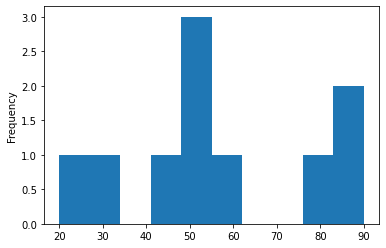

In [13]:
df['math'].plot(kind='hist')
Q1 = df['math'].quantile(.333)
Q2 = df['math'].quantile(.666)
Q3 = df['math'].quantile(1.0)

print("Q1 =", Q1)
print("Q2 =", Q2)
print("Q3 =", Q3)
print(pd.qcut(df.math, 3))

df4= pd.qcut(df.math, 3, labels=False)
print(df4)
df4.value_counts()

In [14]:
import numpy as np
df5= pd.qcut(df.math, 3, labels=np.arange(3, 0, -1))
df5

0    3
1    2
2    3
3    3
4    1
5    3
6    1
7    1
8    3
9    3
Name: math, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [15]:
df6= df.math.groupby(df5)
df7=df6.agg(['count', 'mean', 'std', 'min', 'max'])
df7

,count,mean,std,min,max
math,,,,,
3,6,40.833333,12.812754,20,50
2,1,60.000000,NaN,60,60
1,3,86.666667,5.773503,80,90


In [16]:
df=pd.get_dummies(df)
df.T

,0,1,2,3,4,5,6,7,8,9
student_no,1,2,3,4,5,6,7,8,9,10
science,50,60,78,58,65,98,45,25,15,45
english,98,97,86,98,80,89,90,78,98,93
math,50,60,45,30,90,50,80,90,20,50
class_A,1,1,1,1,0,0,0,0,0,0
class_B,0,0,0,0,1,1,1,1,0,0
class_C,0,0,0,0,0,0,0,0,1,1
sex_m,1,0,0,1,0,1,1,0,0,0
sex_w,0,1,1,0,1,0,0,1,1,1


In [17]:
import pandas as pd

file_path='C:/data/exam_sample.csv'

df= pd.read_csv(file_path)

#df.pivot_table(data, index, columns, values, aggfunc) aggfunc=['mean', 'max']
pd.pivot_table(df,index='class', columns='sex', values='science')
#피봇 테이블...

sex,m,w
class,,
A,54.0,69.0
B,71.5,45.0
C,NaN,30.0


In [18]:
pd.melt(df, id_vars=['student_no', 'class'])

,student_no,class,variable,value
0,1,A,science,50
1,2,A,science,60
2,3,A,science,78
3,4,A,science,58
4,5,B,science,65
5,6,B,science,98
6,7,B,science,45
7,8,B,science,25
8,9,C,science,15
9,10,C,science,45


In [19]:
df.stack()

0  student_no     1
   class          A
   science       50
   english       98
   math          50
   sex            m
1  student_no     2
   class          A
   science       60
   english       97
   math          60
   sex            w
2  student_no     3
   class          A
   science       78
   english       86
   math          45
   sex            w
3  student_no     4
   class          A
   science       58
   english       98
   math          30
   sex            m
4  student_no     5
   class          B
   science       65
   english       80
   math          90
   sex            w
5  student_no     6
   class          B
   science       98
   english       89
   math          50
   sex            m
6  student_no     7
   class          B
   science       45
   english       90
   math          80
   sex            m
7  student_no     8
   class          B
   science       25
   english       78
   math          90
   sex            w
8  student_no     9
   class          C


In [20]:
df.unstack()

student_no  0     1
            1     2
            2     3
            3     4
            4     5
            5     6
            6     7
            7     8
            8     9
            9    10
class       0     A
            1     A
            2     A
            3     A
            4     B
            5     B
            6     B
            7     B
            8     C
            9     C
science     0    50
            1    60
            2    78
            3    58
            4    65
            5    98
            6    45
            7    25
            8    15
            9    45
english     0    98
            1    97
            2    86
            3    98
            4    80
            5    89
            6    90
            7    78
            8    98
            9    93
math        0    50
            1    60
            2    45
            3    30
            4    90
            5    50
            6    80
            7    90
            8    20
            9    50


In [21]:
dates=['2020-01-01', '2020-03-01', '2021-09-01']
print(type(dates))

<class 'list'>


In [22]:
ts_dates=pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [23]:
pr_day=ts_dates.to_period(freq='D') #1일 기간, 구간마다 나누어주는 작업
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]', freq='D')

In [24]:
pr_month=ts_dates.to_period(freq='M')#월 단위
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]', freq='M')

In [25]:
pr_year=ts_dates.to_period(freq='A')#년 단위
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')

In [27]:
import pandas as pd

file_path='C:/data/timeseries.csv'
df= pd.read_csv(file_path)

df.info()
df['new_Date']=pd.to_datetime(df['Date'])
print(df.head())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




In [29]:
df.drop('Date', axis=1, inplace=True)
df.set_index('new_Date', inplace=True)
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2015-07-02  10100  10850  10900  10000  137977
2016-06-29  10700  10550  10900   9990  170253
2017-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2019-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes
None


In [34]:
dates=['2020-01-01', '2020-03-01', '2021-09-01']
ts_dates=pd.to_datetime(dates)
print(ts_dates)
print('\n')

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)




In [38]:
pr_day=ts_dates.to_period(freq='D')
print(pr_day)
pr_month=ts_dates.to_period(freq='M')
print(pr_month)
pr_year=ts_dates.to_period(freq='A')
print(pr_year)

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]', freq='D')
PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]', freq='M')
PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')


In [40]:
timestamp_df=pd.date_range(start='2020-01-01', 
                          end= None,
                          periods=6,
                          freq='MS',
                          tz='Asia/Seoul')
timestamp_df

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-02-01 00:00:00+09:00',
               '2020-03-01 00:00:00+09:00', '2020-04-01 00:00:00+09:00',
               '2020-05-01 00:00:00+09:00', '2020-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [42]:
pr_m=pd.period_range(start= '2020-01-01', end=None, periods =3, freq='M')
print(pr_m)
print('\n')

pr_h=pd.period_range(start= '2020-01-01', end=None, periods =3, freq='H')
print(pr_h)
print('\n')

pr_2h=pd.period_range(start= '2020-01-01', end=None, periods =3, freq='2H')
print(pr_2h)
print('\n')

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]', freq='M')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[H]', freq='H')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]', freq='2H')




In [44]:
import pandas as pd

file_path='C:/data/timeseries.csv'
df= pd.read_csv(file_path)
df.info()
df['new_Date']= pd.to_datetime(df['Date'])
print(df.head())
print('\n')

df['Year']= df['new_Date'].dt.year
df['Month']= df['new_Date'].dt.month
df['Day']= df['new_Date'].dt.day
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [45]:
df['Date_yr']=df['new_Date'].dt.to_period(freq='A')
df['Date_m']=df['new_Date'].dt.to_period(freq='M')
df.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date_m
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06


In [46]:
df.set_index('new_Date', inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06


In [47]:
print(df.loc['2015-07'])
print('\n')
print(df['2019-06'])
print('\n')
print(df['2018-06-25': '2018-06-20'])

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2015-07-02  2015-07-02  10100  10850  10900  10000  137977  2015      7    2   

           Date_yr   Date_m  
new_Date                     
2015-07-02    2015  2015-07  


                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2019-06-26  2019-06-26  10800  10900  11000  10700   63039  2019      6   26   

           Date_yr   Date_m  
new_Date                     
2019-06-26    2019  2019-06  


Empty DataFrame
Columns: [Date, Close, Start, High, Low, Volume, Year, Month, Day, Date_yr, Date_m]
Index: []


<ipython-input-47-ccac477c6c15>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['2019-06'])


In [48]:
today=pd.to_datetime('2020-03-18')
df['time_diff']=today- df.index
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m,time_diff
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,1721 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06,1358 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06,994 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,630 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,266 days


<AxesSubplot:xlabel='new_Date'>

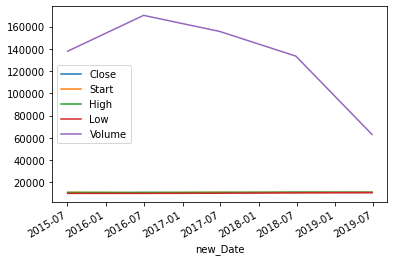

In [51]:
import pandas as pd

file_path='C:/data/timeseries.csv'
df= pd.read_csv(file_path)
df['new_Date']= pd.to_datetime(df['Date'])
df.set_index('new_Date', inplace=True)
df.plot()